In [7]:
# /home/j3nnn1/itba/deepLCourse/20210328_home_BayesDiscreto/12 - SPAM HAM Naive Bayes.ipynb

# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [11]:

import os
from collections import Counter
train_dir = './ling-spam/train-mails'
emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]

In [12]:
emails[0:10]

['./ling-spam/train-mails/8-861msg1.txt',
 './ling-spam/train-mails/3-380msg4.txt',
 './ling-spam/train-mails/spmsgb42.txt',
 './ling-spam/train-mails/spmsgb17.txt',
 './ling-spam/train-mails/spmsgb78.txt',
 './ling-spam/train-mails/spmsgb96.txt',
 './ling-spam/train-mails/spmsga20.txt',
 './ling-spam/train-mails/spmsga81.txt',
 './ling-spam/train-mails/spmsgb40.txt',
 './ling-spam/train-mails/6-22msg1.txt']

In [13]:

with open(emails[2]) as m:
    print(m)
    for i,line in enumerate(m):
        print(i, line)

<_io.TextIOWrapper name='./ling-spam/train-mails/spmsgb42.txt' mode='r' encoding='UTF-8'>
0 Subject: loan debt consolidation

1 

2 loan debt consolidation program are many bill income ? = holiday over , bill start roll . advantage = offer = 20 consolidate bill one payment . credit check = need even = 20 approve program . co - signer , income limit , bad = credit ok . . . . . 90 % approval reat . cut interest payment . . . . . consolidate those credit = card balance . = 20 hit reply daytime phone # name . contact = soon possible . program design bid poor credit . = direct loan , payment send creditor . ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ free offers below # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # | free $ 10 . 0 calling card ! = | | = | | activate calle card = | | call 1-800 - 962-2190 acct rep : pe707779 = | | = | | card number : _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

In [14]:

def make_Dictionary(train_dir):
    # Train dir es la carpeta para parsear
    emails_array = []
    labels = []
    # Emails es una lista con los nombres de los archivos
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]
    # All words contendrá todas las palabras del mail
    all_words = []
    for mail in emails:
        # mail es el nombre del archivo
        with open(mail) as m:
            # m es el archivo abierto
            if 'spmsg' in mail.split('/')[-1]:
                # Si el nombre del archivo contiene 'spmsg' es spam
                labels.append(True)
            else:
                labels.append(False)
            # email_str va a guardar el mail como string
            email_str = ''
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
                    email_str = email_str + ' ' + line
            emails_array.append(email_str)
    dictionary = Counter(all_words)
    return dictionary, emails_array, labels

def remove_uncommon_words(dictionary):
    # Dictionary es un counter
    dict_copy = { k : v for k,v in dictionary.items()}
    list_to_remove = dictionary.keys()
    for item in list_to_remove:
        if item.isalpha() == False:
            # Remueve lo que no sean palabras con letras del abcedario
            del dict_copy[item]
        elif len(item) == 1:
            # Remueve las palabras de una letra
            del dict_copy[item]
    return Counter(dict_copy)

In [15]:

def read_emails_and_get_dict(folder, max_features=3000):
    dictionary, emails_array, labels = make_Dictionary(folder)
    dictionary = remove_uncommon_words(dictionary)
    dictionary = dictionary.most_common(max_features)
    vocabulary = [key[0] for key in dictionary]
    return vocabulary, emails_array, np.array(labels)

In [16]:

max_features = 3000

In [17]:
vocabulary, emails_array, labels = read_emails_and_get_dict('./ling-spam/train-mails', max_features)
count_vectorizer = CountVectorizer(vocabulary=vocabulary)
feature_matrix = count_vectorizer.fit_transform(emails_array)

In [18]:

print(labels[0:10])
print(vocabulary[0:10])
print(feature_matrix)

[False False  True  True  True  True  True  True  True False]
['order', 'address', 'report', 'mail', 'send', 'language', 'email', 'program', 'our', 'list']
  (0, 0)	1
  (0, 1)	1
  (0, 8)	2
  (0, 9)	3
  (0, 10)	1
  (0, 12)	1
  (0, 16)	7
  (0, 18)	3
  (0, 20)	1
  (0, 25)	18
  (0, 27)	1
  (0, 28)	2
  (0, 32)	1
  (0, 36)	1
  (0, 40)	1
  (0, 42)	3
  (0, 45)	2
  (0, 46)	2
  (0, 47)	2
  (0, 56)	1
  (0, 57)	6
  (0, 65)	1
  (0, 68)	9
  (0, 70)	4
  (0, 73)	3
  :	:
  (701, 1040)	1
  (701, 1056)	1
  (701, 1080)	1
  (701, 1081)	1
  (701, 1087)	1
  (701, 1091)	3
  (701, 1108)	1
  (701, 1186)	1
  (701, 1212)	1
  (701, 1238)	2
  (701, 1281)	2
  (701, 1287)	1
  (701, 1353)	1
  (701, 1528)	2
  (701, 1589)	1
  (701, 1657)	3
  (701, 1682)	1
  (701, 1792)	6
  (701, 1950)	1
  (701, 2063)	1
  (701, 2325)	4
  (701, 2370)	2
  (701, 2794)	1
  (701, 2799)	2
  (701, 2906)	1


In [19]:

print(feature_matrix.sum(axis=0).shape)
print(feature_matrix.sum(axis=0))
print(feature_matrix.sum(axis=0) + 1)
print((feature_matrix.sum(axis=0) + 1).sum())

(1, 3000)
[[1423 1302 1216 ...    8    8    8]]
[[1424 1303 1217 ...    9    9    9]]
157993


In [20]:

def get_histogram_from_matrix(alpha, feature_matrix):
    # Alpha es para suavizar y evitar la probabilidad cero. Normalmente 1
    # Es como agregar un mail con todas las palabras
    words_distribution_un = feature_matrix.sum(axis=0) + alpha
    words_distribution = words_distribution_un/(words_distribution_un.sum()) # + alpha*feature_matrix.shape[1])
    return words_distribution

spam_feature_matrix = feature_matrix[labels,:]
ham_feature_matrix = feature_matrix[np.logical_not(labels),:]

print('SPAM:',labels.nonzero()[0].shape[0],
      'HAM:',np.logical_not(labels).nonzero()[0].shape[0],
      'total:',len(labels))

print()
print('Palabras diferentes')
print('SPAM:', spam_feature_matrix.nonzero()[0].shape[0],
      'HAM:',ham_feature_matrix.nonzero()[0].shape[0])

print()
print('Cantidad de palabras')
print('SPAM:',spam_feature_matrix.sum(), 'HAM:',ham_feature_matrix.sum())


# P(x_i/SPAM)
spam_words_distribution = get_histogram_from_matrix(1, spam_feature_matrix)
# P(x_i/HAM)
ham_words_distribution = get_histogram_from_matrix(1, ham_feature_matrix)

SPAM: 351 HAM: 351 total: 702

Palabras diferentes
SPAM: 49304 HAM: 33350

Cantidad de palabras
SPAM: 98153 HAM: 56840


In [21]:
def plot_bar_chart(P, vocabulary = None, title='title'):
    N = len(P)
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    indexes = list(range(1, len(P) + 1))
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    if not vocabulary:
        string_indexes = [str(i) for i in indexes]
    else:
        string_indexes = [vocabulary[i-1] for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes)
    plt.xticks(rotation=60)
    plt.show()

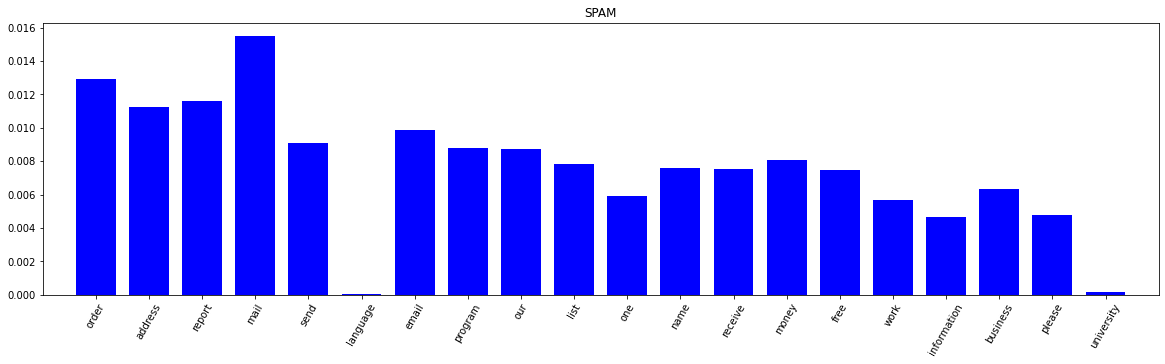

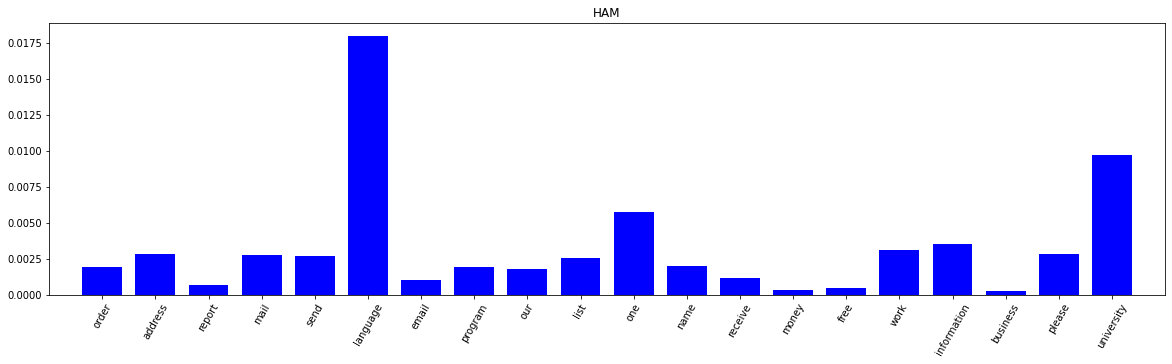

In [22]:

N = 20
plot_bar_chart(np.array(spam_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='SPAM')
plot_bar_chart(np.array(ham_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='HAM')

In [24]:
# Veamos si el primer email es SPAM o no
# El primer mail corresponde a la primer fila de la matriz
row = feature_matrix[0,:]
print('Primer email codificado:')
print(row)
non_zero_row = row.nonzero()
print('Elementos distintos de cero:',non_zero_row[1])
print('Producto, no es necesario [P(Y) = P(SPAM) = P(HAM)] por que es para ambos casos igual. Lo mismo el denominador')
print(np.power(spam_words_distribution[non_zero_row], feature_matrix[non_zero_row]).prod())
print(np.power(ham_words_distribution[non_zero_row], feature_matrix[non_zero_row]).prod())
print('Log likelihood')
print(np.log(spam_words_distribution[non_zero_row])*feature_matrix[non_zero_row].T)
print(np.log(ham_words_distribution[non_zero_row])*feature_matrix[non_zero_row].T)

Primer email codificado:
  (0, 0)	1
  (0, 1)	1
  (0, 8)	2
  (0, 9)	3
  (0, 10)	1
  (0, 12)	1
  (0, 16)	7
  (0, 18)	3
  (0, 20)	1
  (0, 25)	18
  (0, 27)	1
  (0, 28)	2
  (0, 32)	1
  (0, 36)	1
  (0, 40)	1
  (0, 42)	3
  (0, 45)	2
  (0, 46)	2
  (0, 47)	2
  (0, 56)	1
  (0, 57)	6
  (0, 65)	1
  (0, 68)	9
  (0, 70)	4
  (0, 73)	3
  :	:
  (0, 1480)	1
  (0, 1481)	1
  (0, 1650)	1
  (0, 1651)	1
  (0, 1798)	1
  (0, 1945)	1
  (0, 1971)	1
  (0, 1972)	3
  (0, 1973)	1
  (0, 2081)	1
  (0, 2082)	3
  (0, 2083)	1
  (0, 2084)	1
  (0, 2100)	1
  (0, 2209)	1
  (0, 2344)	6
  (0, 2493)	1
  (0, 2661)	1
  (0, 2785)	1
  (0, 2858)	1
  (0, 2859)	1
  (0, 2860)	2
  (0, 2861)	7
  (0, 2862)	1
  (0, 2863)	1
Elementos distintos de cero: [   0    1    8    9   10   12   16   18   20   25   27   28   32   36
   40   42   45   46   47   56   57   65   68   70   73   75   80   82
   86   90   98   99  106  110  112  115  118  120  126  127  128  135
  152  161  164  173  176  177  187  197  217  227  241  245  256  273
  298  30

In [25]:

def get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution):
    P_SPAM = labels.nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    P_HAM = np.logical_not(labels).nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    correct_count = 0
    for i, row in enumerate(feature_matrix):
        coded_email = row.nonzero()
        spam_prod = np.log(spam_words_distribution[coded_email]) * feature_matrix[i][coded_email].T
        ham_prod = np.log(ham_words_distribution[coded_email]) * feature_matrix[i][coded_email].T
        spam_log_likelihood = spam_prod+ np.log(P_SPAM)
        ham_log_likelihood = ham_prod + np.log(P_HAM)
        SPAM = spam_log_likelihood>=ham_log_likelihood
        if SPAM == labels[i]:
            correct_count = correct_count + 1
    print('%0.3f'%(correct_count/len(labels)))

In [26]:

get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution)

0.990


In [27]:

_, emails_array, labels_test = read_emails_and_get_dict('./ling-spam/test-mails', max_features)
count_vectorizer_test = CountVectorizer(vocabulary=vocabulary)
feature_matrix_test = count_vectorizer.fit_transform(emails_array)

In [28]:

get_accuracy(feature_matrix_test, labels_test, spam_words_distribution, ham_words_distribution)

0.962


In [29]:

from sklearn.naive_bayes import MultinomialNB

In [30]:

clf = MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False)

In [31]:

clf.fit(feature_matrix, labels)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False)

In [32]:

clf.score(feature_matrix, labels)

0.99002849002849

In [33]:

clf.score(feature_matrix_test, labels_test)

0.9615384615384616

In [34]:

clf.predict(feature_matrix_test[100:150])

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True, False, False])

In [35]:

clf.predict_proba(feature_matrix_test[100:110])

array([[6.96834881e-068, 1.00000000e+000],
       [9.88836751e-006, 9.99990112e-001],
       [9.99999137e-001, 8.62548520e-007],
       [1.25031398e-285, 1.00000000e+000],
       [4.81705066e-015, 1.00000000e+000],
       [4.70572049e-006, 9.99995294e-001],
       [1.00000000e+000, 2.90245514e-222],
       [1.00000000e+000, 4.30607854e-319],
       [3.98521340e-022, 1.00000000e+000],
       [8.61298025e-011, 1.00000000e+000]])

In [36]:

from sklearn.naive_bayes import BernoulliNB

In [37]:

clf_Ber = BernoulliNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False, binarize=0.5)

In [38]:

clf_Ber.fit(feature_matrix, labels)

BernoulliNB(alpha=1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

In [39]:

clf_Ber.score(feature_matrix, labels)

0.8603988603988604

In [40]:

clf_Ber.score(feature_matrix_test, labels_test)

0.7653846153846153

In [41]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD # componentes principales??
fmd = feature_matrix.todense()
svd = TruncatedSVD(n_components=8, n_iter=200, random_state=42)
svd.fit(fmd.T)
X_embedded = TSNE(n_components=2).fit_transform(svd.components_.T)

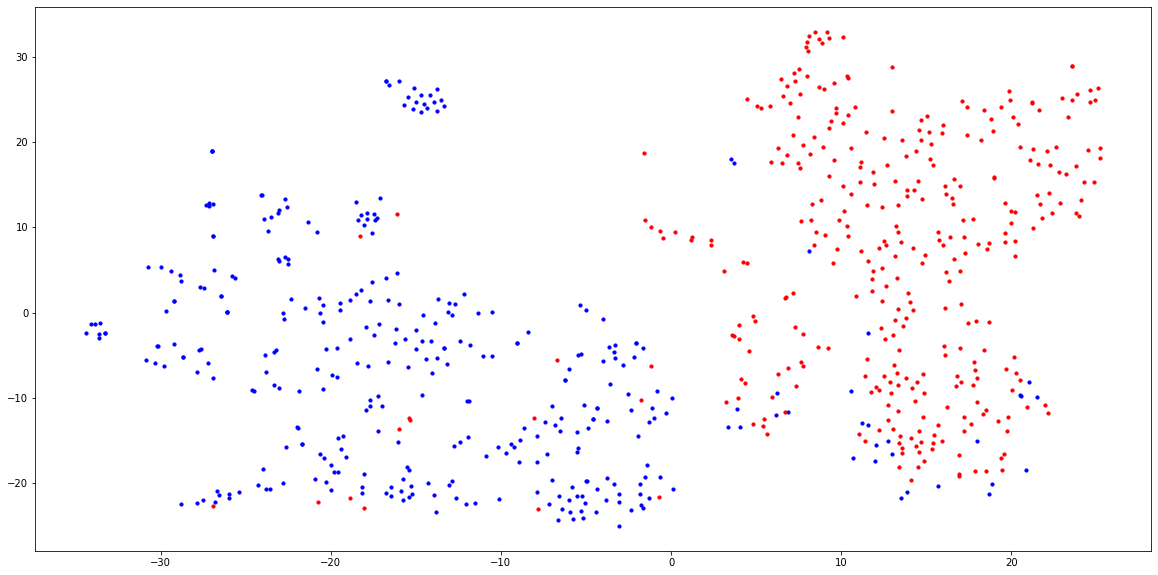

In [42]:

plt.figure(figsize=(20,10))
plt.scatter(X_embedded[labels,0], X_embedded[labels,1], color='b', s=10)
plt.scatter(X_embedded[np.logical_not(labels),0], X_embedded[np.logical_not(labels),1], color='r', s=10)
plt.show()

In [43]:
fmd.shape

(702, 3000)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(fmd)

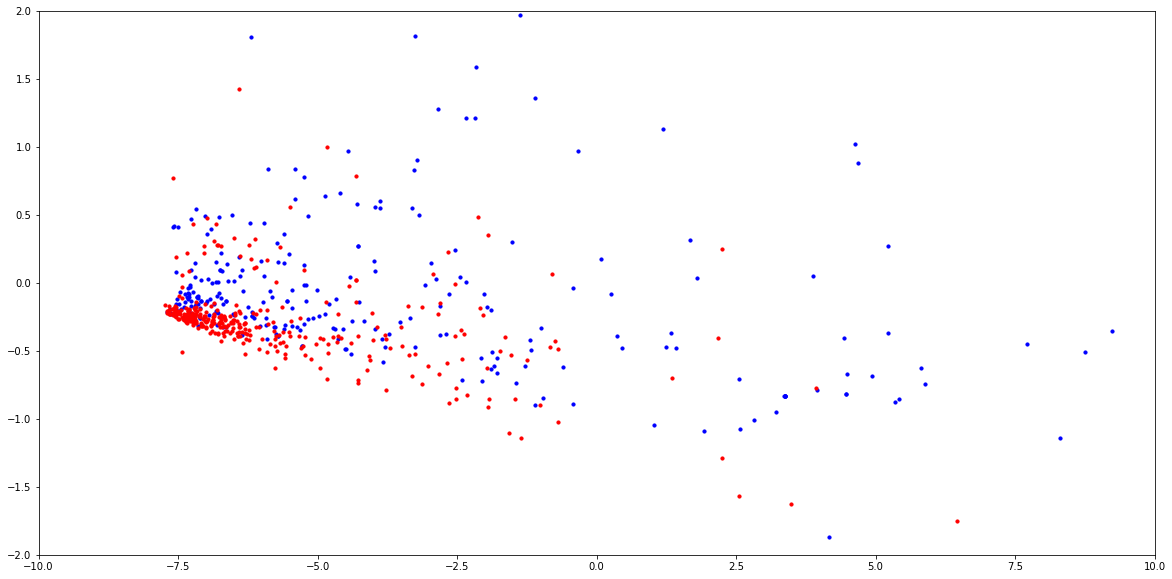

In [46]:
plt.figure(figsize=(20,10))
plt.scatter(X_new[labels,0], X_new[labels,1], color='b', s=10)
plt.scatter(X_new[np.logical_not(labels),0], X_new[np.logical_not(labels),1], color='r', s=10)
plt.ylim([-2,2])
plt.xlim([-10,10])
plt.show()
